# Dam Occupancy

This project has been done by Udacity - AI Turkey Study Group. It is formed of eight parts which are 'Exploratory Data Analysis and Data visualization', 'Data cleaning and extraction', 'Creating train, validation and test datasets', 'Creating a deep learning model', 'Train and validate the model', 'Test the model', 'Get evaluation metrics', and 'Benchmark the model'.

Dam Occupancy dataset contains information about Istanbul's Dam Occupancy Rate between 2005 and 2020, and is downloaded the website of "https://data.ibb.gov.tr".

## Exploratory Data Analysis and Data Visualization

Exploratory Data Analysis (EDA) is a process that consists of analysing and visualising data in order to find useful information, inform results and support decision making. EDA is performed before implementing machine learning model.  It is necessary to make sure that the data we have is variance, bias, the types of distribution, the types of data, and whether the data is structural or not. 


Exploratory Data Analysis in Python is performed with Pandas, Matplotlib and NumPy, which are sampling, feature engineering, correlation, etc..  EDA includes some descriptive statistics, checking the first and last rows of DataFrame, retrieving samples from the data to grasp the data better. For this, querying or indexing the data can be performed.  EDA also helps explore missing values or outlier data. Additionally, it enables to learn how to discover patterns on the data when visualizing the data or utilising some functions for the correlation between attributes. Briefly, it is used to prepare the data for modelling.


##### NumPy, Pandas, Seaborn, and Matplotlib libraries are imported before performing functions for EDA and visualising data.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

##### Read dataset 

In [2]:
df = pd.read_csv("dam_occupancy.csv")

##### Print the first five rows of the 'Dam_Occupancy' dataset in order to get information about data.

In [3]:
df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


##### Print the last five rows of the 'Dam_Occupancy' dataset.

In [4]:
df.tail()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
5815,2020-12-05,23.54,204
5816,2020-12-06,23.30,203
5817,2020-12-07,23.06,200
5818,2020-12-08,22.88,198
5819,2020-12-09,22.66,196


##### Get information about the number of rows and columns.

In [5]:
df.shape

(5820, 3)

The dataset is comprised of 5820 rows, and 3 columns.

##### Show and control information about the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        5820 non-null   object 
 1   GENERAL_DAM_OCCUPANCY_RATE  5820 non-null   float64
 2   GENERAL_DAM_RESERVED_WATER  5820 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 136.5+ KB


In the "GENERAL_DAM_OCCUPANCY_RATE" attribute, the type of data is float64 while the type of data in the "GENERAL_DAM_RESERVED_WATER" attribute is int64. However, the type of data in the "DATE" attribute is object, and thus, the type of the data should be covert to datetime64 type.

##### Convert values belonging to DATE feature from object to datetime64.

In [7]:
df["DATE"] = pd.to_datetime(df["DATE"])

##### Show and check information about the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        5820 non-null   datetime64[ns]
 1   GENERAL_DAM_OCCUPANCY_RATE  5820 non-null   float64       
 2   GENERAL_DAM_RESERVED_WATER  5820 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 136.5 KB


In [9]:
df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


##### Check whether the dataset has the missing value or not.  

In [10]:
df.isna().sum() 

DATE                          0
GENERAL_DAM_OCCUPANCY_RATE    0
GENERAL_DAM_RESERVED_WATER    0
dtype: int64

The dataset does not contain missing value.

##### Explore data with count, mean, standard deviation, etc. 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENERAL_DAM_OCCUPANCY_RATE,5820.0,65.199806,23.248740,9.2,48.9375,67.09,86.4125,99.16
GENERAL_DAM_RESERVED_WATER,5820.0,566.346564,201.967251,80.0,425.0000,583.00,751.0000,861.00


##### Learn how many unique value attributes have before data visualization. 

In [12]:
df.GENERAL_DAM_OCCUPANCY_RATE.nunique()

4000

In [13]:
df.GENERAL_DAM_RESERVED_WATER.nunique()

761

##### Draw line plot to display "The amount of Dam Reserved Water".

Text(0, 0.5, 'Amount')

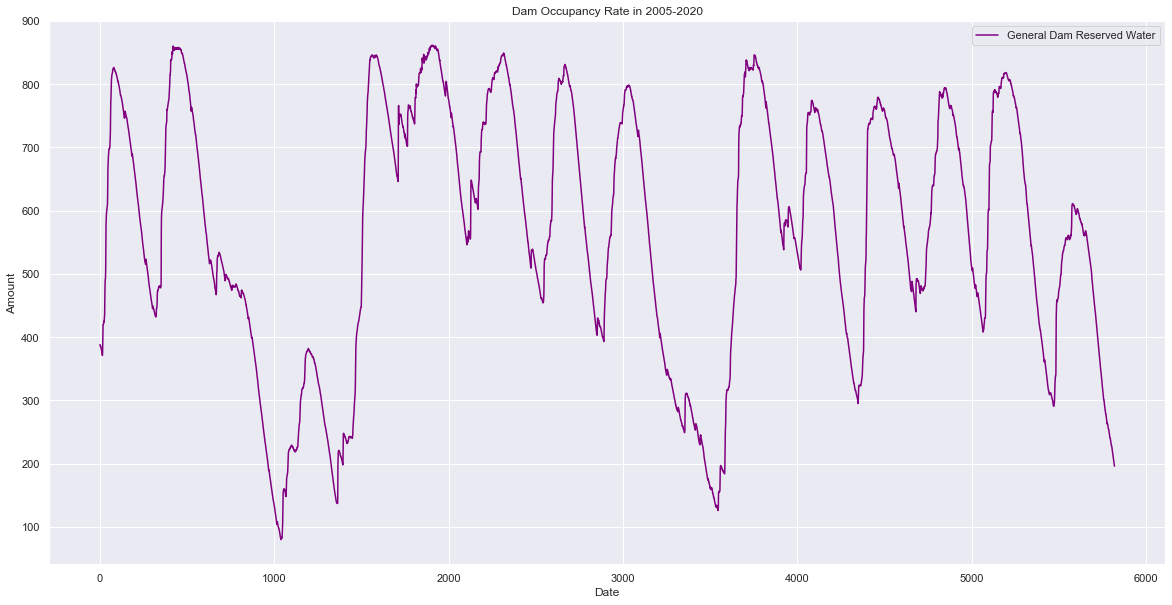

In [14]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(data=df['GENERAL_DAM_RESERVED_WATER'], label= 'General Dam Reserved Water', color='purple')
plt.title("Dam Occupancy Rate in 2005-2020")
plt.xlabel("Date")
plt.ylabel("Amount")

##### Draw line plot to display "Dam Occupancy Rate".

Text(0, 0.5, 'Rate')

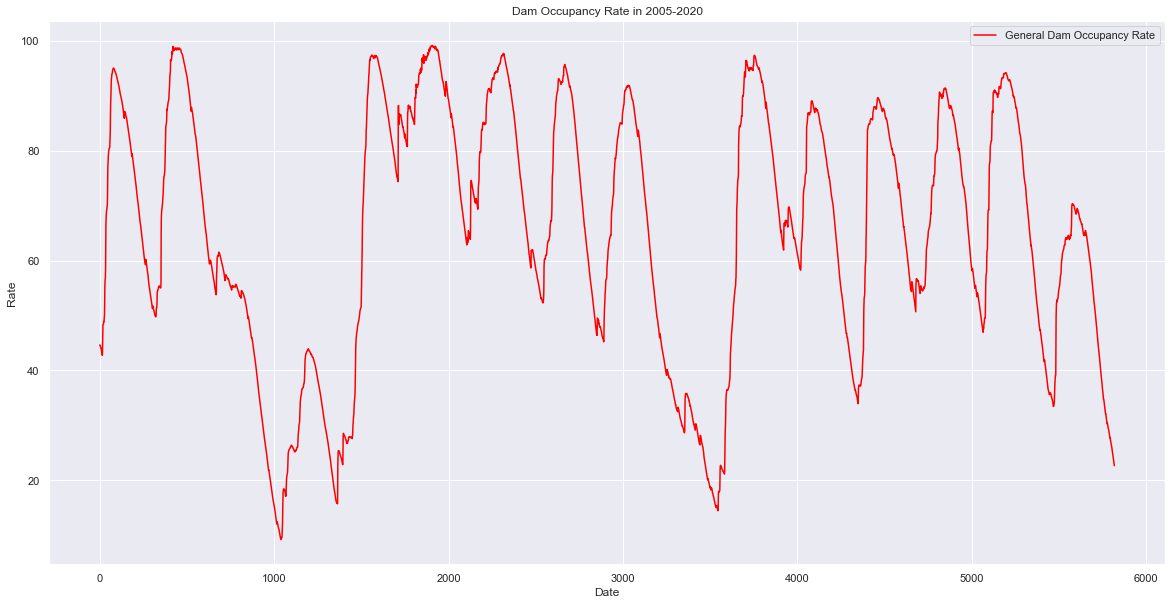

In [15]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(data=df['GENERAL_DAM_OCCUPANCY_RATE'], label= 'General Dam Occupancy Rate', color='red')
plt.title("Dam Occupancy Rate in 2005-2020")
plt.xlabel("Date")
plt.ylabel("Rate")

##### Show the correlation between dam occupancy rate and the amount of dam reserved water. 

In [16]:
df.corr()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
GENERAL_DAM_OCCUPANCY_RATE,1.000000,0.999999
GENERAL_DAM_RESERVED_WATER,0.999999,1.000000


##### Display heatmap for the correlation between dam Occupancy rate and the amount of dam reserved water. 

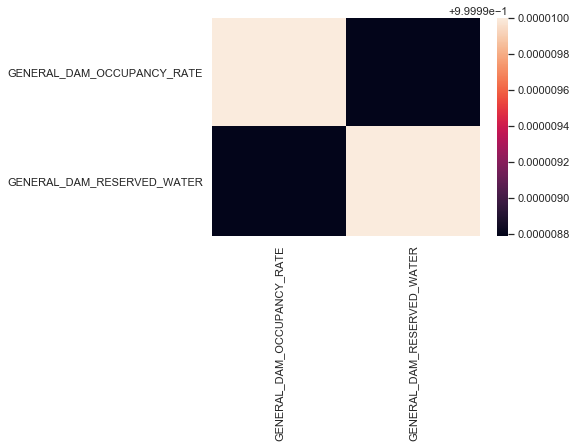

In [17]:
corr = df.corr()
plt.figure(figsize = (6, 4))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

##### Show covariance between dam occupancy rate and the amount of dam reserved water.

In [18]:
df.cov()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
GENERAL_DAM_OCCUPANCY_RATE,540.503923,4695.478488
GENERAL_DAM_RESERVED_WATER,4695.478488,40790.770576


##### Draws histogram graph in order to see the distribution of  the amount of dam reservated water in terms of date.

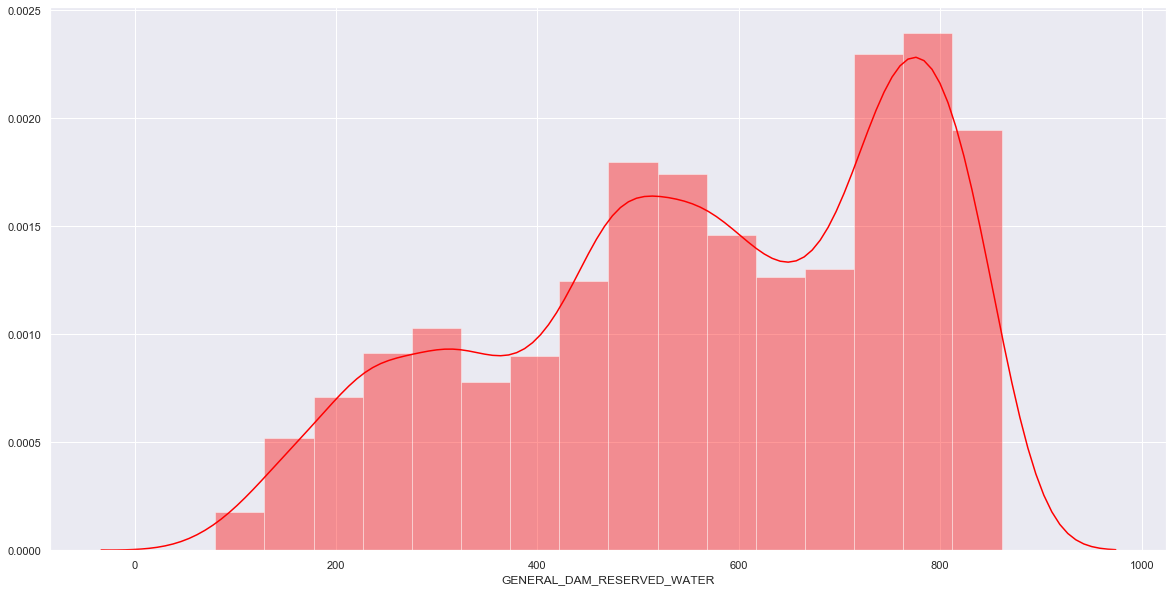

In [19]:
sns.distplot(df["GENERAL_DAM_RESERVED_WATER"], bins=16, color="red");

##### Draws histogram graph in order to see the distribution of dam occupancy rate in terms of date.

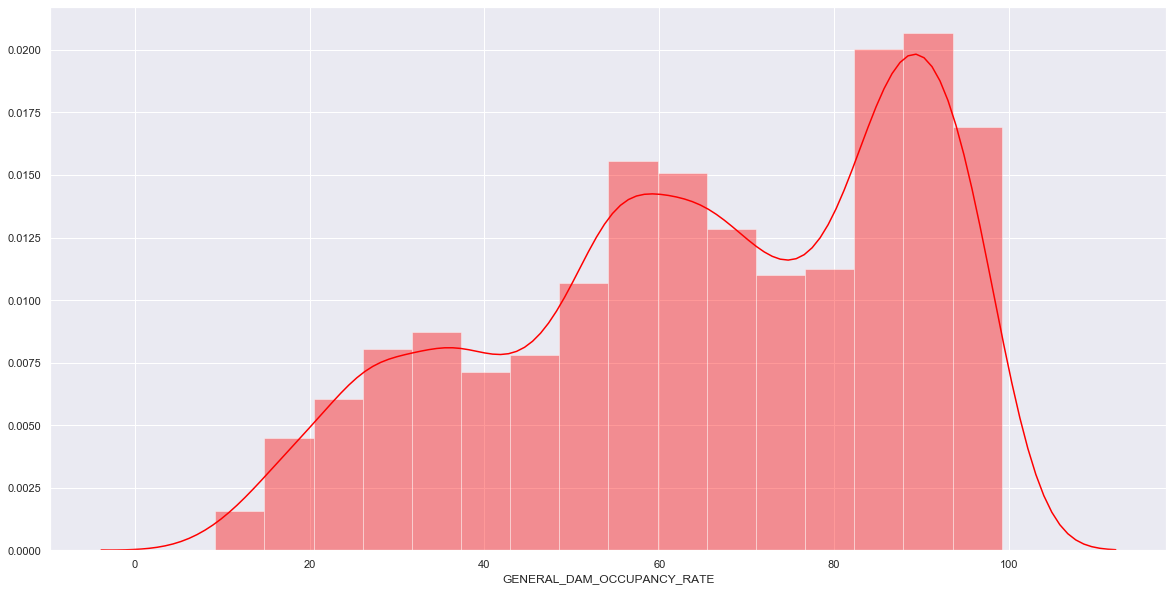

In [20]:
sns.distplot(df["GENERAL_DAM_OCCUPANCY_RATE"], bins=16, color="red");

##### Draw jointplot in order to see the relationship between dam occupancy rate and the amount of dam reserved water, and their distribution. 

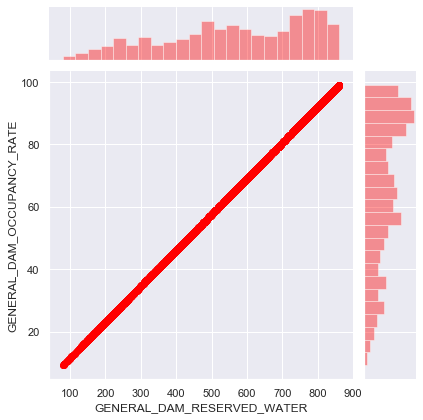

In [21]:
sns.jointplot(x = "GENERAL_DAM_RESERVED_WATER", y = "GENERAL_DAM_OCCUPANCY_RATE", data = df, color="red");

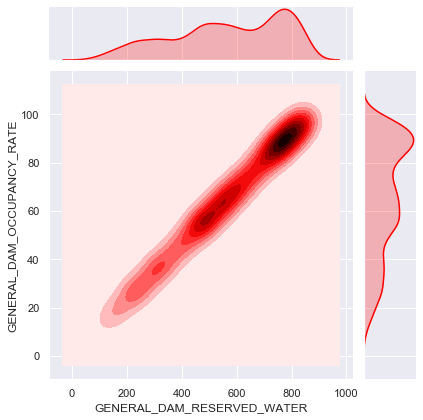

In [22]:
sns.jointplot(x = df["GENERAL_DAM_RESERVED_WATER"], y = df["GENERAL_DAM_OCCUPANCY_RATE"], kind = "kde", color = "red");